# Тестирование библиотеки
В этом файле содержится демонстрация работы функций, сравнение их с аналогами по времени выполнения


In [ ]:
import csv
from math import *
import numpy as np
import pandas as pd
import re
from matplotlib import pyplot as plt
import time
from sympy import MatrixSymbol, Matrix

from matrixLib import *

# Генерация и ввод матриц

In [ ]:
matrix = matrixInput()
matrix

Введите число строк: 2
Введите число стобцов: 2
Далее нужно ввести элементы матрицы.
  Первый индекс - номер строки, второй - элемент строки.
  Для выхода введите 'stop'
a[0][0]1
a[0][1]0
a[1][0]0
a[1][1]-j


[[1.0, 0.0], [0.0, '-j']]

In [ ]:
matrixGenerator(3, 4, min_value = 10, max_value = 20)

array([[19.92914291, 10.69566069, 13.14345385, 19.78764268],
       [14.09898341, 17.06588819, 17.52658189, 19.48799777],
       [15.76004047, 15.50888286, 16.38322683, 13.21542598]])

In [ ]:
matrixOfInts(3, 4, min_value = 5, max_value = 15, count = 3)

array([[[ 9,  6,  7, 13],
        [ 7, 12, 10, 11],
        [11,  8, 10,  6]],

       [[13, 15, 15, 10],
        [ 9,  8,  6, 10],
        [14, 12,  7,  9]],

       [[ 7, 12, 10,  6],
        [14,  5,  7, 12],
        [ 9,  9, 14, 14]]])

In [ ]:
#Функция записи матрицы в csv, функция чтения оттуда

Создание тестовых матриц

In [ ]:
Tests = {'3x3':matrixGenerator(3, 3), '3x3int':matrixOfInts(3, 3),
         '4x4':matrixGenerator(4, 4), '4x4int':matrixOfInts(4, 4),
         '5x5':matrixGenerator(5, 5), '5x5int':matrixOfInts(5, 5),
         '3x4':matrixGenerator(3, 4), '3x4int':matrixOfInts(3, 4),
         '4x3':matrixGenerator(4, 3), '4x3int':matrixOfInts(4, 3)}
Tests

{'3x3': array([[ 8.74842385,  1.80540119,  3.13452173],
        [-1.39527705,  2.40739904,  4.97892515],
        [-1.29778889, -1.49244311, -1.21680883]]),
 '3x3int': array([[ -2,  10,   9],
        [-10,   4,   0],
        [  7,  -2,  -4]]),
 '3x4': array([[ 0.09319981, -9.09547358,  8.9510372 , -9.18547211],
        [ 1.51656631, -3.25985418,  6.88034789, -0.22206138],
        [ 1.8622395 , -7.86269755,  3.80546146, -6.69705902]]),
 '3x4int': array([[ 4,  8,  2, -6],
        [-1,  7, -9, -1],
        [-3, -5, -2,  8]]),
 '4x3': array([[-7.74705183, -8.22005498,  8.02641344],
        [ 0.91046071, -5.00583923, -1.50796653],
        [ 6.7389118 ,  5.39121864, -0.5318026 ],
        [-0.37323808, -4.30270094, -1.2735534 ]]),
 '4x3int': array([[-8,  2, -8],
        [ 0, -2, -8],
        [-2, -7,  4],
        [10,  6,  3]]),
 '4x4': array([[ 0.01351092, -7.99717808, -5.36596187,  2.13847251],
        [-0.82614449,  8.18324413, -5.56791366,  7.51030573],
        [ 5.34008883,  6.06257643, -

In [ ]:
print("Тестовая генерация матрицы целых чисел 3х4:\n")
print(Tests['3x4int'])
print(matrixShape(Tests['3x4int']))

Тестовая генерация матрицы целых чисел 3х4:

[[ 4  8  2 -6]
 [-1  7 -9 -1]
 [-3 -5 -2  8]]
(3, 4)


# Транспонирование матрицы

In [ ]:
print(Tests['3x4int'])
print(Transpose1(Tests['3x4int']))

[[ 4  8  2 -6]
 [-1  7 -9 -1]
 [-3 -5 -2  8]]
[[4, -1, -3], [8, 7, -5], [2, -9, -2], [-6, -1, 8]]


In [ ]:
print(Tests['3x4int'])
print(Transpose2(Tests['3x4int']))

[[ 4  8  2 -6]
 [-1  7 -9 -1]
 [-3 -5 -2  8]]
[[4, -1, -3], [8, 7, -5], [2, -9, -2], [-6, -1, 8]]


In [ ]:
test = Matrix(Tests['3x4int'])
print(test.T)
print(np.transpose(Tests['3x4int'])) # из библиотеки numpy
print(test.T.tolist()==np.transpose(Tests['3x4int']))
type(test.T.tolist())

Matrix([[4, -1, -3], [8, 7, -5], [2, -9, -2], [-6, -1, 8]])
[[ 4 -1 -3]
 [ 8  7 -5]
 [ 2 -9 -2]
 [-6 -1  8]]
[[ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]]


list

In [ ]:
def SympyTranspose(matrix):
  return Matrix(matrix).T
  
def NumpyTranspose(matrix):
  return matrix.transpose()

In [ ]:
number_of_tests = 50
funcs = [Transpose1, Transpose2, SympyTranspose, NumpyTranspose]
func_names = [i.__name__ for i in funcs]
Times = {name:[] for name in func_names}

#Тестирую функции Transpose1, Transpose2, функцию из библиотеки numpy и sympy

for i in range(number_of_tests):
  test_matrix = matrixGenerator(100, 100, min_value = -10, max_value = 10)
  for func in funcs:
    start_time = time.time()
    func(test_matrix)
    Times[func.__name__].append(time.time() - start_time)

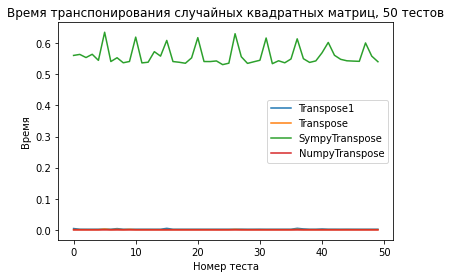

Среднее время выполнения транспонирования случайных квадратных матриц, 50 тестов
Transpose1: 0.002473 s
Transpose: 0.001130 s
SympyTranspose: 0.558830 s
NumpyTranspose: 0.000012 s


In [ ]:
for name in func_names:
  plt.plot(Times[name])
plt.title('Время транспонирования случайных квадратных матриц, {} тестов'.format(number_of_tests))
plt.legend(func_names)
plt.xlabel('Номер теста')
plt.ylabel('Время')
plt.show()
print('Среднее время выполнения транспонирования случайных квадратных матриц, {} тестов'.format(number_of_tests))
for name in func_names:
  print('{}: %.6f s'.format(name) % (sum(Times[name])/number_of_tests))

In [ ]:
#На неквадратных матрицах
number_of_tests = 50
funcs = [Transpose1, Transpose2, SympyTranspose, NumpyTranspose]
func_names = [i.__name__ for i in funcs]
Times = {name:[] for name in func_names}

#Тестирую функции Transpose1, Transpose2, функцию из библиотеки numpy и sympy

for i in range(number_of_tests):
  test_matrix = matrixGenerator(40, 250, min_value = -10, max_value = 10)
  for func in funcs:
    start_time = time.time()
    func(test_matrix)
    Times[func.__name__].append(time.time() - start_time)

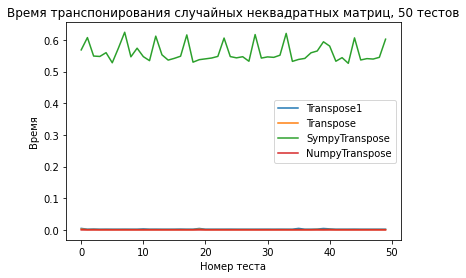

Среднее время выполнения транспонирования случайных неквадратных матриц, 50 тестов
Transpose1: 0.002590 s
Transpose: 0.001096 s
SympyTranspose: 0.558916 s
NumpyTranspose: 0.000012 s


In [ ]:
for name in func_names:
  plt.plot(Times[name])
plt.title('Время транспонирования случайных неквадратных матриц, {} тестов'.format(number_of_tests))
plt.legend(func_names)
plt.xlabel('Номер теста')
plt.ylabel('Время')
plt.show()
print('Среднее время выполнения транспонирования случайных неквадратных матриц, {} тестов'.format(number_of_tests))
for name in func_names:
  print('{}: %.6f s'.format(name) % (sum(Times[name])/number_of_tests))

# Матричные преобразования


# Определитель матрицы

In [ ]:
print(Tests['4x4int'])
print(red(Tests['4x4int'], 2, 3))

[[ -1  -4   6  -4]
 [  6   5   1   0]
 [-10  -6   7  -3]
 [ -4  -4   4   1]]
[[-1, -4, 6], [6, 5, 1], [-4, -4, 4]]


In [ ]:
print(Tests['3x3int'])
det(Tests['3x3int'])


[[ -2  10   9]
 [-10   4   0]
 [  7  -2  -4]]


-440

Возник вопрос: стоит ли добавить ускоренный расчет определителя 3х3 в функцию? А стоило ли добавлять 2х2?

In [ ]:
#тест на матрицах 3х3, целые и дробные числа
funcs = [det1, det2, det3]
func_names = [i.__name__ for i in funcs]*2
for i in range(len(funcs)): func_names[i]+=' integers'
for i in range(len(funcs), len(funcs*2)): func_names[i]+=' floats'

Times = {name:[] for name in func_names}

number_of_tests = 100
for i in range(number_of_tests):
  # генерирую матрицу
  int_matrix = matrixOfInts(3, 3)
  matrix = matrixGenerator(3, 3)

  for func in funcs:

    start_time = time.time()
    func(matrix)
    Times[func.__name__ + ' floats'].append(time.time() - start_time)

    start_time = time.time()
    func(int_matrix)
    Times[func.__name__ + ' integers'].append(time.time() - start_time)

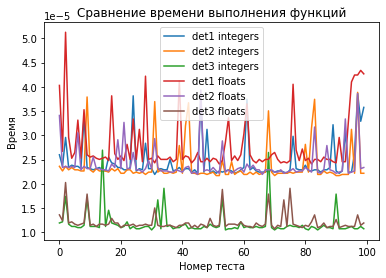

Среднее время выполнения функций:
det1 integers : 0.0244 ms
det2 integers : 0.0237 ms
det3 integers : 0.0118 ms
det1 floats : 0.0278 ms
det2 floats : 0.0240 ms
det3 floats : 0.0120 ms


In [ ]:
for name in func_names:
  plt.plot(Times[name])
plt.title('Сравнение времени выполнения функций')
plt.legend(func_names)
plt.xlabel('Номер теста')
plt.ylabel('Время')
plt.show()
print('Среднее время выполнения функций:')
for name in func_names:
  print(name, ': %.4f ms' % (sum(Times[name])/number_of_tests * 1000))

Как показывает график, чаще всего функция, использующая готовую формулу определителя матрицы 3х3, быстрее, причем в 2 раза. Очевидно, что для матриц 4х4 и больше, тенденция сохранится. Тем более рекурсивных вызовов функций станет меньше. Я ожидаю, что отрыв увеличится.

In [ ]:
#тест на матрицах matrixSize*matrixSize, целые и дробные числа
funcs = [det1, det2, det3]
func_names = [i.__name__ for i in funcs]*2
for i in range(len(funcs)): func_names[i]+=' integers'
for i in range(len(funcs), len(funcs*2)): func_names[i]+=' floats'

Times = {name:[] for name in func_names}

number_of_tests = 100
matrixSize = 7

for i in range(number_of_tests):
  # генерирую матрицу
  int_matrix = matrixOfInts(matrixSize, matrixSize)
  matrix = matrixGenerator(matrixSize, matrixSize)

  for func in funcs:

    start_time = time.time()
    func(matrix)
    Times[func.__name__ + ' floats'].append(time.time() - start_time)

    start_time = time.time()
    func(int_matrix)
    Times[func.__name__ + ' integers'].append(time.time() - start_time)

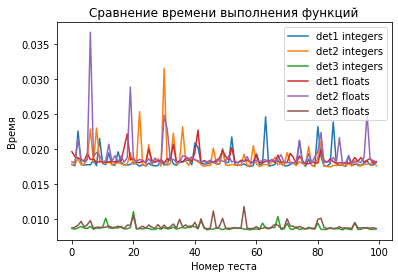

Среднее время выполнения функций:
det1 integers : 18.3793 ms
det2 integers : 18.5404 ms
det3 integers : 8.8127 ms
det1 floats : 18.5900 ms
det2 floats : 19.0546 ms
det3 floats : 9.0408 ms


In [ ]:
for name in func_names:
  plt.plot(Times[name])
plt.title('Сравнение времени выполнения функций')
plt.legend(func_names)
plt.xlabel('Номер теста')
plt.ylabel('Время')
plt.show()
print('Среднее время выполнения функций:')
for name in func_names:
  print(name, ': %.4f ms' % (sum(Times[name])/number_of_tests * 1000))

Тесты на матрицах размеров 4х4, 5х5, 6х6, 7х7 показали отрыв в 2 раза
Я решил попробовать добавить формулу определителя 4х4, чтобы посмотреть разницу

In [ ]:
mat = Tests['5x5int']
print(det1(mat))
print(det2(mat))
print(det3(mat))
print(det4(mat))

-83884
-83884
-83884
-83884


In [ ]:
# тест на матрицах matrixSize*matrixSize, целые и дробные числа

funcs = [det3, det4]
func_names = [i.__name__ for i in funcs]*2
for i in range(len(funcs)): func_names[i]+=' integers'
for i in range(len(funcs), len(funcs*2)): func_names[i]+=' floats'

Times = {name:[] for name in func_names}

number_of_tests = 50
matrixSize = 8

for i in range(number_of_tests):
  # генерирую матрицу
  int_matrix = matrixOfInts(matrixSize, matrixSize)
  matrix = matrixGenerator(matrixSize, matrixSize)

  for func in funcs:

    start_time = time.time()
    func(matrix)
    Times[func.__name__ + ' floats'].append(time.time() - start_time)

    start_time = time.time()
    func(int_matrix)
    Times[func.__name__ + ' integers'].append(time.time() - start_time)

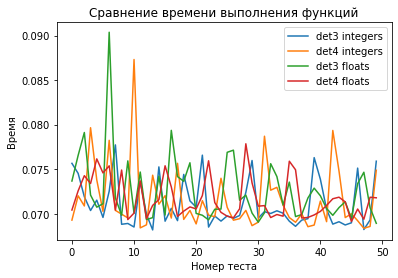

Среднее время выполнения функций:
det3 integers : 71.108 ms
det4 integers : 71.568 ms
det3 floats : 72.576 ms
det4 floats : 71.735 ms


In [ ]:
for name in func_names:
  plt.plot(Times[name])
plt.title('Сравнение времени выполнения функций')
plt.legend(func_names)
plt.xlabel('Номер теста')
plt.ylabel('Время')
plt.show()
print('Среднее время выполнения функций:')
for name in func_names:
  print(name, ': %.3f ms' % (sum(Times[name])/number_of_tests *1000))

Эксперименты показали, что использование формулы определителя 4х4 не дает преимущества перед функцией, использующей формулу 3х3. Но при этом функция с формулой 3х3 в 2 раза быстрее, чем без нее.

Сравню функцию det3 с функциями из библиотек

In [ ]:
# тест на матрицах matrixSize*matrixSize, целые и дробные числа
funcs = [det3, np.linalg.det]
func_names = [i.__name__ for i in funcs]*2
for i in range(len(funcs)): func_names[i]+=' integers'
for i in range(len(funcs), len(funcs*2)): func_names[i]+=' floats'

Times = {name:[] for name in func_names}

number_of_tests = 100
matrixSize = 7

for i in range(number_of_tests):
  # генерирую матрицу
  int_matrix = matrixOfInts(matrixSize, matrixSize)
  matrix = matrixGenerator(matrixSize, matrixSize)

  for func in funcs:

    start_time = time.time()
    func(matrix)
    Times[func.__name__ + ' floats'].append(time.time() - start_time)

    start_time = time.time()
    func(int_matrix)
    Times[func.__name__ + ' integers'].append(time.time() - start_time)

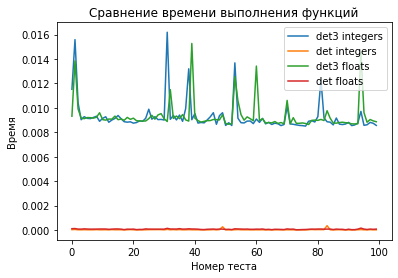

Среднее время выполнения функций:
det3 integers : 9.267 ms
det integers : 0.032 ms
det3 floats : 9.329 ms
det floats : 0.075 ms


In [ ]:
for name in func_names:
  plt.plot(Times[name])
plt.title('Сравнение времени выполнения функций')
plt.legend(func_names)
plt.xlabel('Номер теста')
plt.ylabel('Время')
plt.show()
print('Среднее время выполнения функций:')
for name in func_names:
  print(name, ': %.3f ms' % (sum(Times[name])/number_of_tests *1000))